# Thématique 4 - Analyse bivariée mixte

### Importation des librairies

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data pre-processing

In [3]:
# Préparation du fichier de données
filepath = "../data"
filename = "EnsSuperieurData.csv"
file = os.path.join(filepath, filename)

# Lecture des données
df_original = pd.read_csv(file, delimiter=";")
df = df_original.copy()

df = df.drop(columns=['Unnamed: 0'], errors='ignore')

# Affichage des indicateurs de positions et de dispersions
df.describe()

,Homme,Femme,Population totale
count,3.300000e+01,3.300000e+01,3.300000e+01
mean,3.097086e+05,3.621331e+05,1.773910e+07
std,3.965330e+05,4.374172e+05,2.371209e+07
min,5.360000e+02,2.640000e+02,3.535600e+04
25%,6.510700e+04,8.228500e+04,3.366357e+06
50%,1.330200e+05,1.517710e+05,7.640238e+06
75%,3.182050e+05,3.194180e+05,1.640540e+07
max,1.441722e+06,1.333039e+06,8.221784e+07


Ce jeu de données comptabilise le nombre d'étudiants en études supérieurs par sexe pour chaque pays. Ici nous comptons 33 pays, soit 33 individus. Il y a au moins 536 étudiants et 264 étudiantes dans chaque pays et au plus 1441722 étudiants et 1333039 étudiantes dans cet échantillon de pays. A savoir que la population totale moyenne de l'ensemble des pays est de 177391 habitants.

In [4]:
df.head()

,Homme,Femme,Population totale
Belgique,180609,221043,10666866
Bulgarie,118139,146324,7640238
République tchèque,174858,217682,10381130
Danemark,96903,133804,5475791
Allemagne (réunifiée à partir de 1991),1128954,1116184,82217837


In [5]:
df.tail()

,Homme,Femme,Population totale
Liechtenstein,536,264,35356
Norvège,83297,129375,4737171
Suisse,113873,110596,7593494
Croatie,65107,78303,4436401
Turquie,1441722,1090900,70586256


In [6]:
df.shape

(33, 3)

On sait qu'il y a 33 pays pour 3 variables à étudier.

In [7]:
df.dtypes

Homme                int64
Femme                int64
Population totale    int64
dtype: object

Dans cette étude, nous avons que des variables quantitatives.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, Belgique to Turquie
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Homme              33 non-null     int64
 1   Femme              33 non-null     int64
 2   Population totale  33 non-null     int64
dtypes: int64(3)
memory usage: 1.0+ KB


In [9]:
df.columns

Index(['Homme', 'Femme', 'Population totale'], dtype='object')

Explication des variables :
- Homme : Nombre d'hommes en études supérieures dans un pays
- Femme : Nombre de femmes en études supérieures dans un pays
- Population totale : Population totale d'un pays

In [10]:
df.isnull().sum()

Homme                0
Femme                0
Population totale    0
dtype: int64

Le jeu de données n'a pas l'air de présenter de données manquantes.

In [11]:
list_col = df.columns

for col in list_col: 
    print('{} :{} ' . format(col.upper(), df[col].unique()))

HOMME :[ 180609  118139  174858   96903 1128954   26102   81723  318205  818747
  969564  857341   13093   45475   82107    1558  173931    3988  291177
  133020  918787  175177  461253   48322   91120  141757  161570  996455
    5915     536   83297  113873   65107 1441722] 
FEMME :[ 221043  146324  217682  133804 1116184   42066   96795  319418  962272
 1194974 1156515   12595   82285  122660    1453  239784    5484  311109
  151771 1247193  201740  595369   67123  138357  167891  245309 1333039
   10716     264  129375  110596   78303 1090900] 
POPULATION TOTALE :[10666866  7640238 10381130  5475791 82217837  1340935  4401335 11213785
 45283259 64007193 59619290   789269  2270894  3366357   483799 10045401
   410290 16405399  8318592 38115641 10617575 21528627  2010269  5400998
  5300484  9182927 61191951   315459    35356  4737171  7593494  4436401
 70586256] 


In [12]:
print(df)

                                          Homme    Femme  Population totale
Belgique                                 180609   221043           10666866
Bulgarie                                 118139   146324            7640238
République tchèque                       174858   217682           10381130
Danemark                                  96903   133804            5475791
Allemagne (réunifiée à partir de 1991)  1128954  1116184           82217837
Estonie                                   26102    42066            1340935
Irlande                                   81723    96795            4401335
Grèce                                    318205   319418           11213785
Espagne                                  818747   962272           45283259
France                                   969564  1194974           64007193
Italie                                   857341  1156515           59619290
Chypre                                    13093    12595             789269
Lettonie    

## Analyse des données

### Etudiants vs étudiantes

Nous allons débuter cette analyse par examiner la répartition totale des étudiants (hommes et femmes combinés) pour l'ensemble des pays. Un simple diagramme circulaire devrait permettre d'apporter une première analyse de la répartition globale.

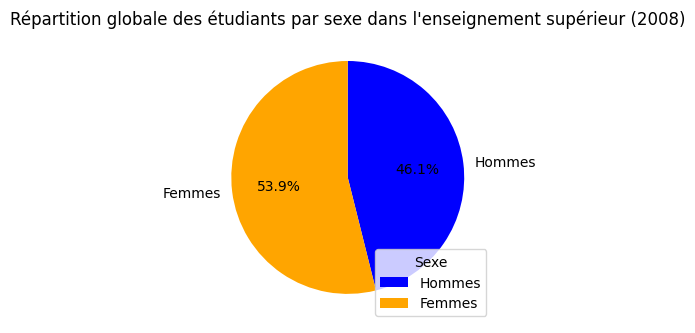

In [13]:
# Données des hommes et femmes (totaux calculés précédemment)
total_hommes = df['Homme'].sum()
total_femmes = df['Femme'].sum()

# Préparation des données pour le diagramme circulaire
labels = ['Hommes', 'Femmes']
sizes = [total_hommes, total_femmes]
colors = ['blue', 'orange']

# Création du diagramme circulaire
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, counterclock=False)

# Ajouter une légende
plt.legend(labels, title="Sexe", loc="lower right")

# Ajouter un titre
plt.title("Répartition globale des étudiants par sexe dans l'enseignement supérieur (2008)")

# Affichage du diagramme
plt.tight_layout()
plt.show()

Cette étude de 2008 permet de montrer que la répartition des étudiants est quasiment équivalente et cela sur l'ensemble du jeu de données. Il y a légèrement plus de femmes que d'hommes, mais elles ne représentent que 54% de l'effectif total des étudiants.

Ce qui maintenant peut être intéressant, c'est de voir la proportion de femmes et d'hommes pour chaque pays. Sauf qu'avec un tel graphique, l'analyse serait visuellement compliquée du à une surcharge d'informations.

<Figure size 2000x600 with 0 Axes>

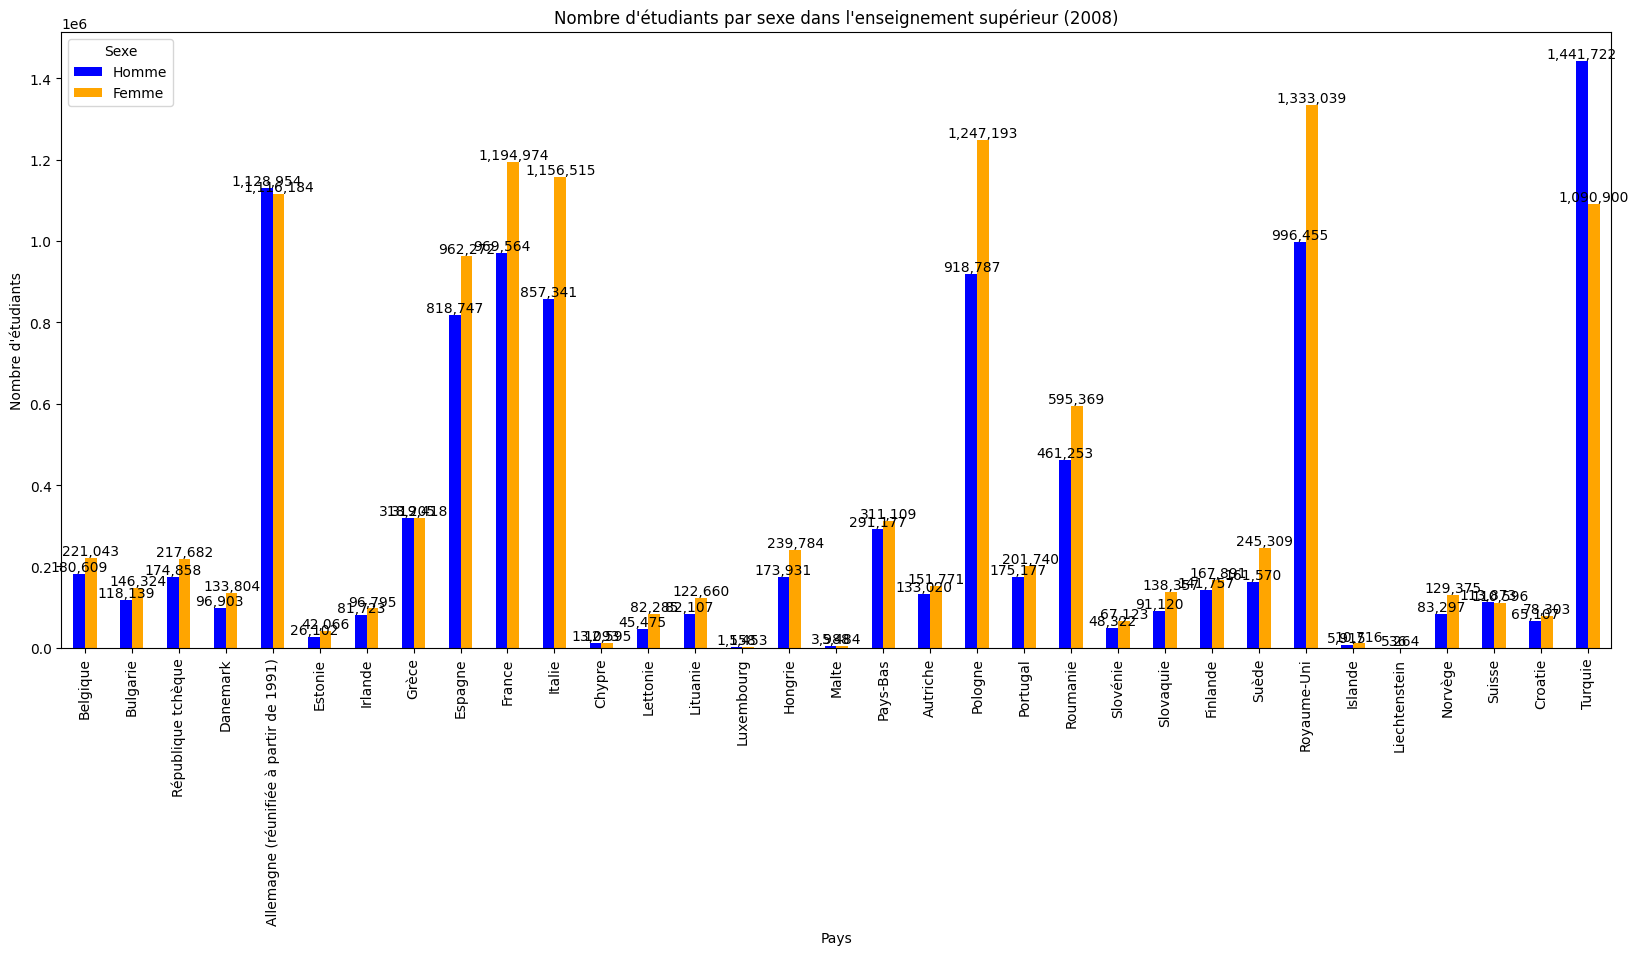

In [14]:
# Création de l'histogramme
plt.figure(figsize=(20,6))

ax = df[['Homme', 'Femme']].plot(kind='bar', stacked=False, figsize=(20, 8), color=['blue', 'orange'])

# Ajout des valeurs sur chaque barre
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height() + p.get_y()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Titre et labels
plt.title("Nombre d'étudiants par sexe dans l'enseignement supérieur (2008)")
plt.xlabel("Pays")
plt.ylabel("Nombre d'étudiants")
plt.xticks(rotation=90)
plt.legend(title='Sexe')

# Affichage de l'histogramme
plt.show()

Ce diagramme en bâtons permet de montrer le nombre d'étudiants par sexe dans l'enseignement supérieur de façon plus précise que précédemment. En effet, cela confirme bien l'observation précédente, pour quasi tous les pays, la proportion de femmes est plus grande que celle d'hommes. A l'exception de la Turquie, mais cette différence est compensée par toutes les autres.

In [15]:
df['Majoritaire'] = np.where(df['Homme'] > df['Femme'], 'Homme', 'Femme')

df

,Homme,Femme,Population totale,Majoritaire
Belgique,180609,221043,10666866,Femme
Bulgarie,118139,146324,7640238,Femme
République tchèque,174858,217682,10381130,Femme
Danemark,96903,133804,5475791,Femme
Allemagne (réunifiée à partir de 1991),1128954,1116184,82217837,Homme
Estonie,26102,42066,1340935,Femme
Irlande,81723,96795,4401335,Femme
Grèce,318205,319418,11213785,Femme
Espagne,818747,962272,45283259,Femme
France,969564,1194974,64007193,Femme


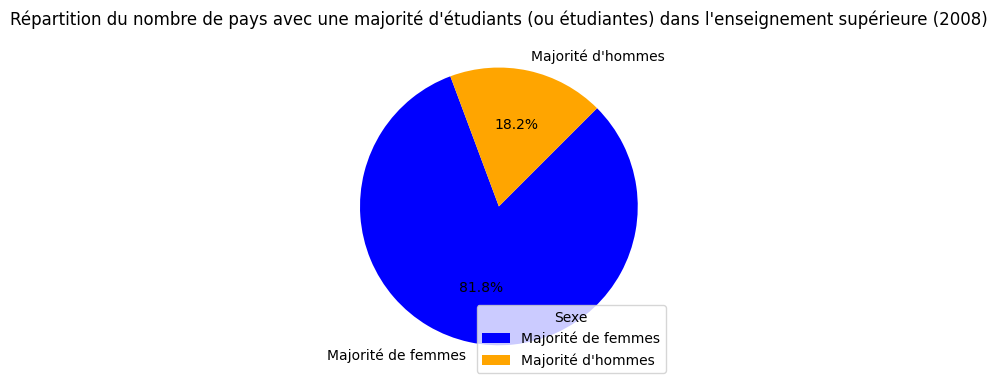

In [16]:
# Données des hommes et femmes (totaux calculés précédemment)
count = df.Majoritaire.value_counts()

# Préparation des données pour le diagramme circulaire
labels = ['Majorité de femmes', 'Majorité d\'hommes']
colors = ['blue', 'orange']

# Création du diagramme circulaire
plt.figure(figsize=(4, 4))
plt.pie(count, labels=labels, colors=colors, autopct='%1.1f%%', startangle=45, counterclock=False)

# Ajouter une légende
plt.legend(labels, title="Sexe", loc="lower right")

# Ajouter un titre
plt.title("Répartition du nombre de pays avec une majorité d'étudiants (ou étudiantes) dans l'enseignement supérieure (2008)")

# Affichage du diagramme
plt.tight_layout()
plt.show()

En 2008, il y a seulement 18,2% des pays qui ont une majorité d'hommes comme étudiants contre 81.8% de pays avec une majorité d'étudiantes que d'étudiants.

Outliers pour les hommes: [1128954, 818747, 969564, 857341, 918787, 996455, 1441722]
Outliers pour les femmes: [1116184, 962272, 1194974, 1156515, 1247193, 1333039, 1090900]


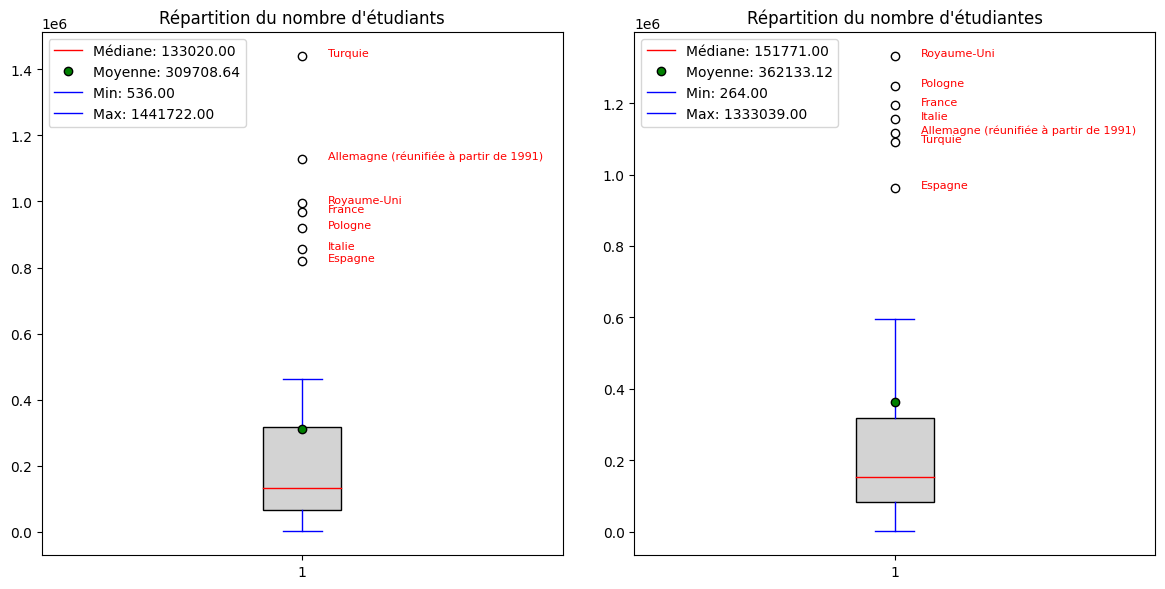

In [17]:
x = df['Homme']
y = df['Femme']

# Fonction pour détecter les outliers via la méthode IQR
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_indices = [i for i, x in enumerate(data) if x < lower_bound or x > upper_bound]
    outliers = [data[i] for i in outliers_indices]
    
    return outliers, outliers_indices

# Détection des outliers
outliers_x, indices_outliers_x = detect_outliers_iqr(x)
outliers_y, indices_outliers_y = detect_outliers_iqr(y)

print(f"Outliers pour les hommes: {outliers_x}")
print(f"Outliers pour les femmes: {outliers_y}")

cities = df.index

# Création de la figure pour les boxplots
plt.figure(figsize=(12, 6))

# Couleurs personnalisées pour min, max, médiane, moyenne
colors = dict(whiskers="blue", caps="blue", medians="red", means="green", fliers="purple")

# Boxplot
plt.subplot(1, 2, 1)
bp1 = plt.boxplot(x, showmeans=True, patch_artist=True,
                  boxprops=dict(facecolor="lightgray"),
                  whiskerprops=dict(color=colors['whiskers']),
                  capprops=dict(color=colors['caps']),
                  medianprops=dict(color=colors['medians']),
                  meanprops=dict(markerfacecolor=colors['means'], marker="o", markeredgecolor="black"))

plt.title("Répartition du nombre d'étudiants")

# Récupération des statistiques
median_x = np.median(x)
mean_x = np.mean(x)
min_x = np.min(x)
max_x = np.max(x)

# Ajout de la légende
plt.legend([bp1["medians"][0], bp1["means"][0], bp1["whiskers"][0], bp1["whiskers"][1]],
           [f"Médiane: {median_x:.2f}", f"Moyenne: {mean_x:.2f}", 
            f"Min: {min_x:.2f}", f"Max: {max_x:.2f}"],
           loc="upper left")

# Ajouter des annotations pour les outliers
for i in indices_outliers_x:
    plt.text(1.05, x[i], cities[i], color='red', fontsize=8, ha='left')

# Boxplot pour x
plt.subplot(1, 2, 2)
bp2 = plt.boxplot(y, showmeans=True, patch_artist=True,
                  boxprops=dict(facecolor="lightgray"),
                  whiskerprops=dict(color=colors['whiskers']),
                  capprops=dict(color=colors['caps']),
                  medianprops=dict(color=colors['medians']),
                  meanprops=dict(markerfacecolor=colors['means'], marker="o", markeredgecolor="black"))

plt.title("Répartition du nombre d'étudiantes")

# Récupération des statistiques
median_y = np.median(y)
mean_y = np.mean(y)
min_y = np.min(y)
max_y = np.max(y)

# Ajout de la légende pour y
plt.legend([bp2["medians"][0], bp2["means"][0], bp2["whiskers"][0], bp2["whiskers"][1]],
           [f"Médiane: {median_y:.2f}", f"Moyenne: {mean_y:.2f}", 
            f"Min: {min_y:.2f}", f"Max: {max_y:.2f}"],
           loc="upper left")

# Ajouter des annotations pour les outliers de y
for i in indices_outliers_y:
    plt.text(1.05, y[i], cities[i], color='red', fontsize=8, ha='left')

# Affichage du graphique
plt.tight_layout()
plt.show()

Les deux variables sont assez dispersées. Chez les étudiants, certains pays en dénombrent seulement 536 pour le Liechtenstein contre 1 441 722 en Turquie, de même chez les femmes, 264 étudiantes au Liechtenstein contre 1 333 039 au Royaume-Uni. De plus, la moyenne du nombre de femmes est plus élevées, avec 362 133 étudiantes en moyenne dans chaque pays contre 309 708 chez les hommes. En 2008, il y aurait donc moins d'étudiants que d'étudiantes.

De façon générale, ce sont les mêmes pays qui sont considérés comme des individus atypiques du point de vue des boîtes de Tukey :
- Allemagne (réunifiée à partir de 1991)
- Espagne
- France
- Italie
- Pologne
- Royaume-Uni
- Turquie

Par contre, il y a une plus forte proportion de pays avec un nombre d'étudiants plus proche de la moyenne d'étudiants par pays que chez les étudiantes. Mais cela est probablement du au fait qu'il y a moins d'étudiantes.

Dans les deux cas, et encore plus chez les étudiantes, l'écart entre la médiane et la moyenne, ainsi que le fait que le maximum est très éloigné du minimum, suggère une distribution légèrement asymétrique. Cela signifie qu'il y a quelques pays avec une proportion relativement élevée d'étudiants (resp étudiantes) par rapport à leur population, ce qui tire la moyenne vers le haut, mais la majorité des pays se situent autour de la médiane.

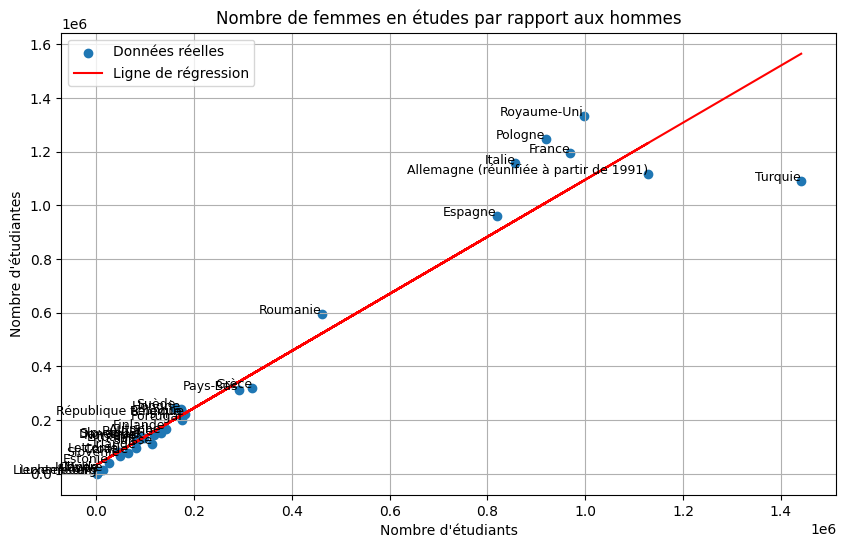

Coefficient de régression: 1.062698776933227
Intercept: 33006.13214282732
R^2 score: 0.9280841854107689


In [18]:
from sklearn.linear_model import LinearRegression

# Données
X = np.array(x).reshape(-1, 1)
y = np.array(y)

# Modèle de régression linéaire
model = LinearRegression()
model.fit(X, y)

# Prédictions
y_pred = model.predict(X)

# Affichage du graphique avec la ligne de régression
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Données réelles')

# Ajout des noms des pays comme labels
for i, pays in enumerate(df.index):
    plt.text(x[i], y[i], pays, fontsize=9, ha='right')

plt.plot(x, y_pred, color='red', label='Ligne de régression')
plt.xlabel("Nombre d'étudiants")
plt.ylabel("Nombre d'étudiantes")
plt.title("Nombre de femmes en études par rapport aux hommes")
plt.legend()
plt.grid(True)
plt.show()

# Coefficients
print(f"Coefficient de régression: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")
print(f"R^2 score: {model.score(X, y)}")

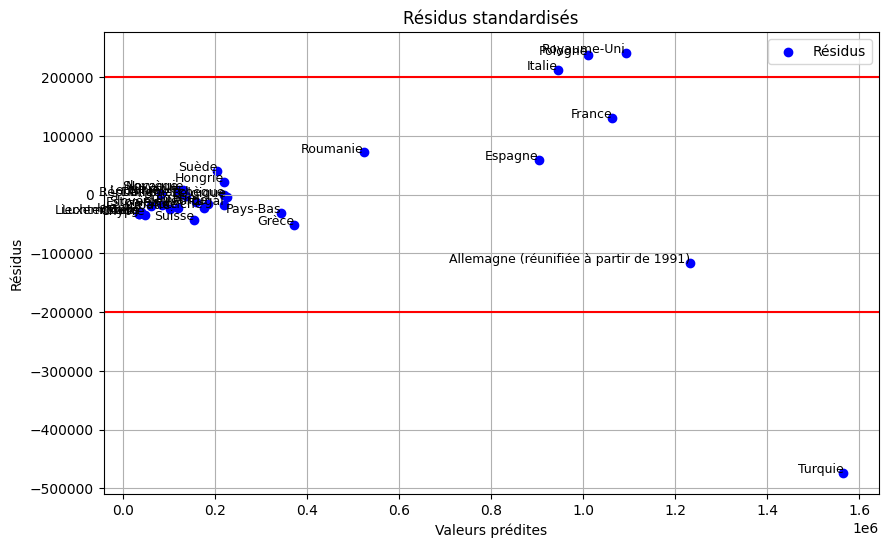

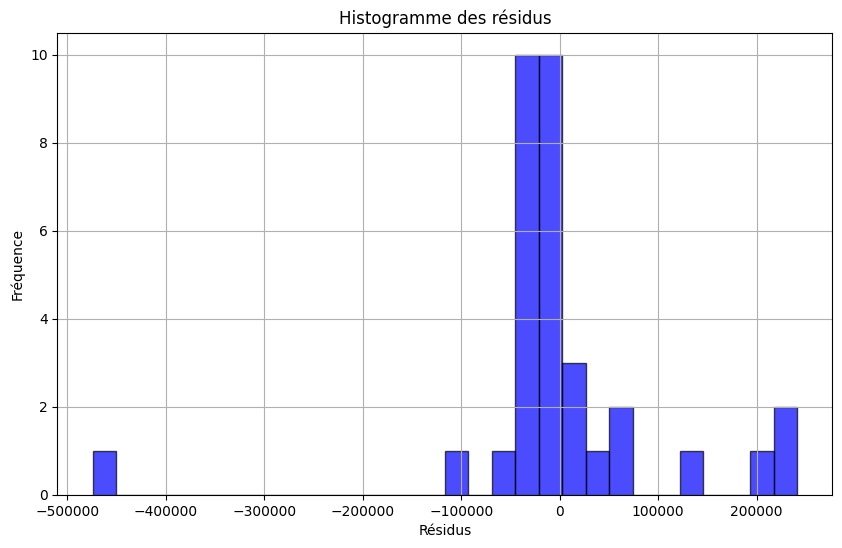

Statistique de Durbin-Watson: 1.342261006801483


In [19]:
# Calcul des résidus
residuals = y - y_pred
df['residuals'] = residuals

# Graphique des résidus
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', label='Résidus')

# Ajout des noms des pays comme labels
for i, pays in enumerate(df.index):
    plt.text(y_pred[i], residuals[i], pays, fontsize=9, ha='right')

plt.axhline(y=200000, color='red', linestyle='-')
plt.axhline(y=-200000, color='red', linestyle='-')
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.title("Résidus standardisés")
plt.grid(True)
plt.legend()
plt.show()

import scipy.stats as stats

# Histogramme des résidus
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel("Résidus")
plt.ylabel("Fréquence")
plt.title("Histogramme des résidus")
plt.grid(True)
plt.show()

from statsmodels.stats.stattools import durbin_watson

# Test de Durbin-Watson
dw_stat = durbin_watson(residuals)
print(f"Statistique de Durbin-Watson: {dw_stat}")

D'après les graphiques des résidus, la Turquie se distingue comme un individu atypique qu'il pourrait être intéressant de supprimer, mais ici ce n'est pas le but.

### Décomposition de la variance : Homme et Femme

In [28]:
df_temp = pd.concat([df['Homme'], df['Femme']], ignore_index=True)

# Calculs préparatoires
eff_total = df_temp.describe()['count']
mean_total = df_temp.describe()['mean']
var_total = df_temp.describe()['std'] * df_temp.describe()['std'] * (eff_total - 1) / eff_total

# Initialisation de variables
var_intra = 0 # Variance intra-classes
var_inter = 0 # Variance inter-classes

# Initialisation de la liste pour les données du tableau
data = []

# Pour chaque site
for sexe in ['Homme', 'Femme'] :
    # Initialisation des données du site à traiter
    df_site = df[sexe]

    # Récapitulatif sur les données du site
    list_site = df_site
    eff_site = list_site.describe()['count']
    mean_site = list_site.describe()['mean']
    var_site = sum((i - mean_site) ** 2 for i in list_site) / eff_site
    m_site = df_site.describe()['25%'] - 1.5*(df_site.describe()['75%'] - df_site.describe()['25%'])
    M_site = df_site.describe()['75%'] + 1.5*(df_site.describe()['75%'] - df_site.describe()['25%'])

    data.append({
        "Sexe": sexe,
        "Effectif": eff_site,
        "Moyenne": mean_site,
        "Variance": var_site,
        "Médiane": list_site.describe()['50%'],
        "Q1": list_site.describe()['25%'],
        "Q3": list_site.describe()['75%'],
        "m": m_site,
        "M": M_site
    })

    # Mise à jour des variances
    var_intra += eff_site*var_site
    var_inter += eff_site*((mean_site - mean_total)**2)

# Mise à jour des variances
var_intra /= eff_total
var_inter /= eff_total

# Créer le DataFrame avec les données
df_result = pd.DataFrame(data)

# Afficher le tableau
print(df_result)

# Affichage de messages
print("Variance intra    = " + str(var_intra))
print("Variance inter    = " + str(var_inter))
print("Somme inter+intra = " + str(var_intra + var_inter))
print("Rapport           = " + str(var_inter / var_total))

    Sexe  Effectif        Moyenne      Variance   Médiane       Q1        Q3  \
0  Homme      33.0  309708.636364  1.524736e+11  133020.0  65107.0  318205.0   
1  Femme      33.0  362133.121212  1.855358e+11  151771.0  82285.0  319418.0   

          m         M  
0 -314540.0  697852.0  
1 -273414.5  675117.5  
Variance intra    = 169004703200.4114
Variance inter    = 687081652.9072547
Somme inter+intra = 169691784853.31866
Rapport           = 0.004048997737286853


### Etudiants vs population totale

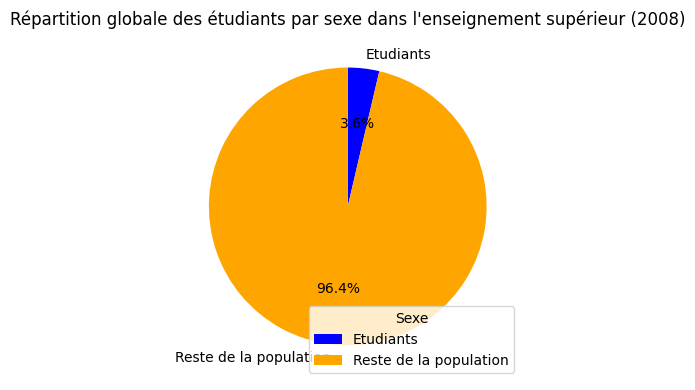

In [21]:
# Données des hommes et femmes (totaux calculés précédemment)
total_etudiants = df['Homme'] + df['Femme']
total_etudiants = total_etudiants.sum()
total_population = df['Population totale'].sum()

# Préparation des données pour le diagramme circulaire
labels = ['Etudiants', 'Reste de la population']
data = [total_etudiants, total_population]
colors = ['blue', 'orange']

# Création du diagramme circulaire
plt.figure(figsize=(4, 4))
plt.pie(data, labels=labels, colors=['blue', 'orange'], autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title("Répartition globale des étudiants par sexe dans l'enseignement supérieur (2008)")
plt.legend(labels, title="Sexe", loc="lower right")

plt.tight_layout()

# Affichage du diagramme
plt.show()

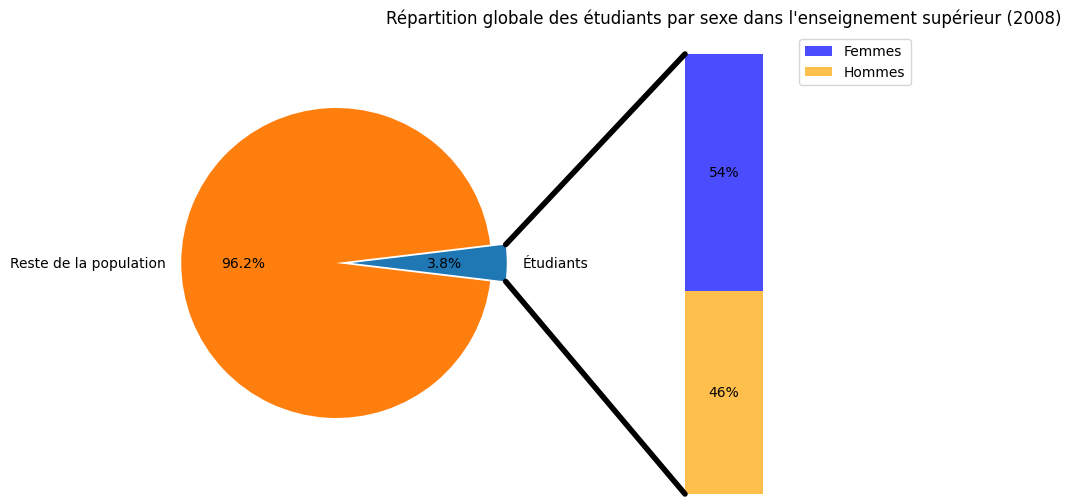

In [22]:
from matplotlib.patches import ConnectionPatch

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
fig.subplots_adjust(wspace=0)

# Diagramme circulaire : Répartition étudiants vs population totale
overall_ratios = [total_etudiants / total_population, (total_population - total_etudiants) / total_population]
labels_circulaire = ['Étudiants', 'Reste de la population']
explode = [0.1, 0]
# Faire en sorte que le diagramme démarre à un certain angle
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels_circulaire, explode=explode)

# Diagramme en bâton : Répartition homme/femme parmi les étudiants
homme_ratio = total_hommes / total_etudiants
femme_ratio = total_femmes / total_etudiants
labels_baton = ['Hommes', 'Femmes']
bar_ratios = [homme_ratio, femme_ratio]
colors_baton = ['blue', 'orange']

# Paramètres du diagramme en bâton
bottom = 1
width = .2

for j, (height, label) in enumerate(reversed([*zip(bar_ratios, labels_baton)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color=colors_baton[j], label=label, alpha=0.7)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title("Répartition des étudiants")
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# Lignes de connexion entre les graphiques
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(bar_ratios)

# Ligne de connexion du haut
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# Ligne de connexion du bas
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.title("Répartition globale des étudiants par sexe dans l'enseignement supérieur (2008)")

# Affichage du graphique
plt.show()

Ce graphique permet de résumer la proportion des hommes et femmes au sein des étudiants de l'ensemble des pays face à l'ensemble de la population.

Outliers pour les hommes: [2245138, 1781019, 2164538, 2013856, 2165980, 2329494, 2532622]
Outliers pour les femmes: [82217837, 45283259, 64007193, 59619290, 38115641, 61191951, 70586256]
Outliers pour la population: [6.223658998881767]


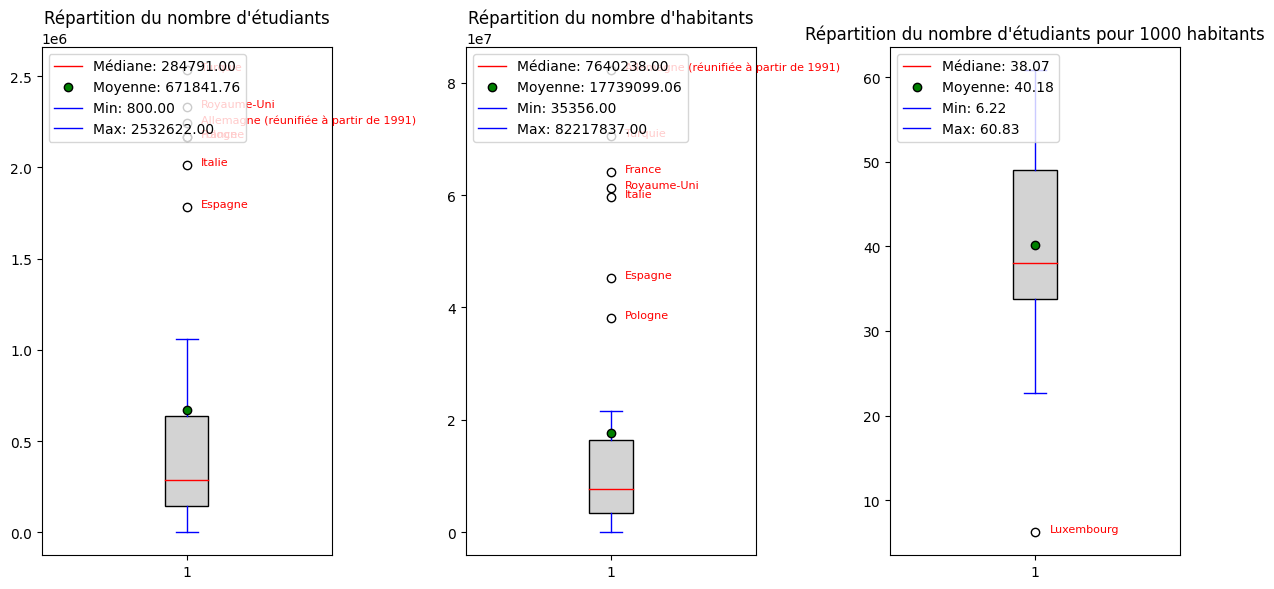

In [23]:
x = df['Homme'] + df['Femme']
y = df['Population totale']
z = x / df['Population totale'] * 1000

# Détection des outliers
outliers_x, indices_outliers_x = detect_outliers_iqr(x)
outliers_y, indices_outliers_y = detect_outliers_iqr(y)
outliers_z, indices_outliers_z = detect_outliers_iqr(z)

print(f"Outliers pour les hommes: {outliers_x}")
print(f"Outliers pour les femmes: {outliers_y}")
print(f"Outliers pour la population: {outliers_z}")

cities = df.index

# Création de la figure pour les boxplots
plt.figure(figsize=(12, 6))

# Couleurs personnalisées pour min, max, médiane, moyenne
colors = dict(whiskers="blue", caps="blue", medians="red", means="green", fliers="purple")

# Boxplot
plt.subplot(1, 3, 1)
bp1 = plt.boxplot(x, showmeans=True, patch_artist=True,
                  boxprops=dict(facecolor="lightgray"),
                  whiskerprops=dict(color=colors['whiskers']),
                  capprops=dict(color=colors['caps']),
                  medianprops=dict(color=colors['medians']),
                  meanprops=dict(markerfacecolor=colors['means'], marker="o", markeredgecolor="black"))

plt.title("Répartition du nombre d'étudiants")

# Récupération des statistiques
median_x = np.median(x)
mean_x = np.mean(x)
min_x = np.min(x)
max_x = np.max(x)

# Ajout de la légende pour nb_eleves
plt.legend([bp1["medians"][0], bp1["means"][0], bp1["whiskers"][0], bp1["whiskers"][1]],
           [f"Médiane: {median_x:.2f}", f"Moyenne: {mean_x:.2f}", 
            f"Min: {min_x:.2f}", f"Max: {max_x:.2f}"],
           loc="upper left")

# Ajouter des annotations pour les outliers
for i in indices_outliers_x:
    plt.text(1.05, x[i], cities[i], color='red', fontsize=8, ha='left')

# Boxplot
plt.subplot(1, 3, 2)
bp2 = plt.boxplot(y, showmeans=True, patch_artist=True,
                  boxprops=dict(facecolor="lightgray"),
                  whiskerprops=dict(color=colors['whiskers']),
                  capprops=dict(color=colors['caps']),
                  medianprops=dict(color=colors['medians']),
                  meanprops=dict(markerfacecolor=colors['means'], marker="o", markeredgecolor="black"))

plt.title("Répartition du nombre d'habitants")

# Récupération des statistiques
median_y = np.median(y)
mean_y = np.mean(y)
min_y = np.min(y)
max_y = np.max(y)

# Ajout de la légende
plt.legend([bp2["medians"][0], bp2["means"][0], bp2["whiskers"][0], bp2["whiskers"][1]],
           [f"Médiane: {median_y:.2f}", f"Moyenne: {mean_y:.2f}", 
            f"Min: {min_y:.2f}", f"Max: {max_y:.2f}"],
           loc="upper left")

# Ajouter des annotations pour les outliers
for i in indices_outliers_y:
    plt.text(1.05, y[i], cities[i], color='red', fontsize=8, ha='left')

# Boxplot
plt.subplot(1, 3, 3)
bp3 = plt.boxplot(z, showmeans=True, patch_artist=True,
                  boxprops=dict(facecolor="lightgray"),
                  whiskerprops=dict(color=colors['whiskers']),
                  capprops=dict(color=colors['caps']),
                  medianprops=dict(color=colors['medians']),
                  meanprops=dict(markerfacecolor=colors['means'], marker="o", markeredgecolor="black"))

plt.title("Répartition du nombre d'étudiants pour 1000 habitants")

# Récupération des statistiques
median_z = np.median(z)
mean_z = np.mean(z)
min_z = np.min(z)
max_z = np.max(z)

# Ajout de la légende
plt.legend([bp3["medians"][0], bp3["means"][0], bp3["whiskers"][0], bp3["whiskers"][1]],
           [f"Médiane: {median_z:.2f}", f"Moyenne: {mean_z:.2f}", 
            f"Min: {min_z:.2f}", f"Max: {max_z:.2f}"],
           loc="upper left")

# Ajouter des annotations pour les outliers
for i in indices_outliers_z:
    plt.text(1.05, z[i], cities[i], color='red', fontsize=8, ha='left')

# Affichage du graphique
plt.tight_layout()
plt.show()

#### Répartition du nombre d'étudiants :
Comme expliqué précédemment, certains pays sortent du lot vis-à-vis du nombre d'étudiants au point d'être considéré comme des individus atypiques, ce qui fait augmenter la moyenne alors que la valeur de la médiane est 2 fois plus petite que celle de la moyenne. Là où le Liechenstein dénombre 800 étudiants, la Turquie elle, en compte 671 841. La représentation de la boîte à moustache montre bien l'hétérogénéité en nombre d'étudiants pour chaque pays de part la forme étendue qu'elle prend. 

#### Répartition du nombre d'habitants :
De même pour la population, bien que moins allongée, la moyenne tend à être plus élevée que la médiane. Ainsi, cela crée une dissonance entre les pays. Cela est fortement marqué par l'Allemagne, la France, le Royaume-Uni, l'Italie, l'Espagne et la Pologne qui ont beaucoup plus d'habitants que les autres pays, venant ainsi augmenter la moyenne.

Ici, la moyenne est plus que 2 fois supérieure à la médiane, montrant que le maximum est bien plus éloigné du minimum, ce qui suggère une distribution asymétrique. Pour le coup, l'écart entre la population des pays est très flagrante. Le pays avec la plus faible population en compte 35356 (Liechtenstein), alors que l'Allemagne en compte 82 221 837.

#### Répartition du nombre d'étudiants pour 1000 habitants :
En revanche, lorsque l'on regarde la répartition des étudiants pour 1000 habitants en fonction de chaque pays. Seul le Liechenstein se distingue comme un individu atypique avec un nombre beaucoup plus faible d'étudiants par habitants que les autres pays. Alors qu'il y a des pays avec une proportion relativement élevée détudiants par rapport à leur population. Il est possible que ce soit un pays avec une forte importance pour l'éducation dans le supérieur. 

La moyenne de 40,18 étudiants pour 1000 habitants reflète la valeur moyen du nomnbre d'étudiants des pays. Cependant, comme elle est influencée par les valeurs extrêmes, la présence d'outliers comme Liechtenstein pourrait légèrement diminuer cette moyenne.

La médiane (38,07 étudiants pour 1000 habitants) signifie que la moitié des pays ont une proportion d’étudiants inférieure à 38,07, tandis que l'autre moitié est au-dessus. Cela donne une bonne idée de la répartition centrale des données et du niveau de l'enseignement supérieur dans la majorité des pays européens étudiés.

L'écart entre la médiane et la moyenne, ainsi que le fait que le maximum est bien plus éloigné du minimum, suggère une distribution légèrement asymétrique. Cela signifie qu'il y a quelques pays avec une proportion relativement élevée d'étudiants par rapport à leur population, ce qui tire la moyenne vers le haut, mais la majorité des pays se situent autour de la médiane.

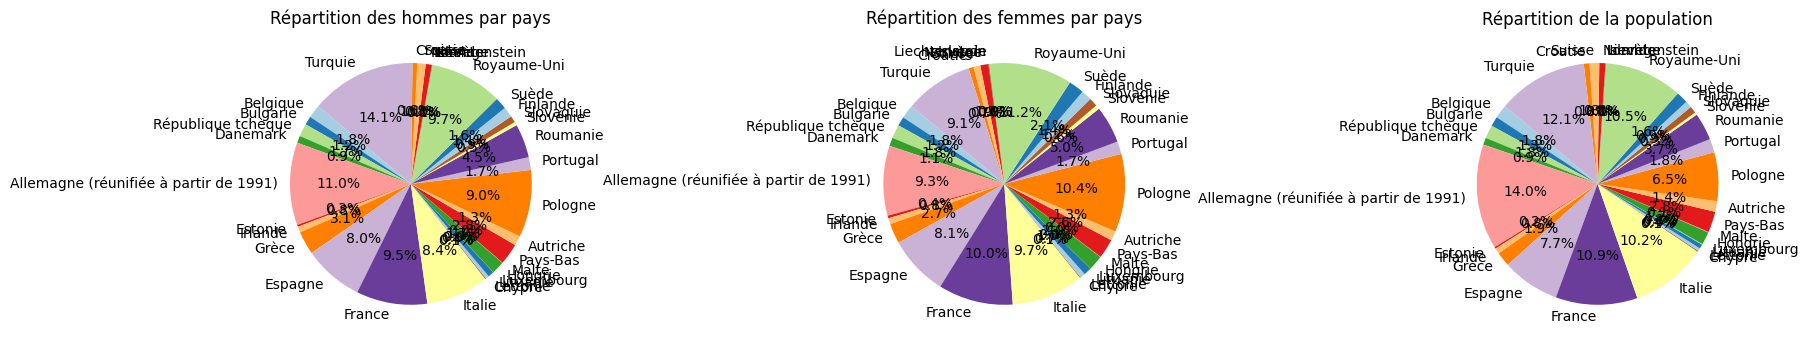

In [24]:
# Création de la figure avec 3 sous-graphiques (1 ligne, 3 colonnes)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].pie(df['Homme'], labels=df['Homme'].index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
axs[0].set_title(f'Répartition des hommes par pays')

axs[1].pie(df['Femme'], labels=df['Femme'].index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
axs[1].set_title(f'Répartition des femmes par pays')

axs[2].pie(df['Population totale'], labels=df['Population totale'].index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
axs[2].set_title(f'Répartition de la population')

# Ajustement de l'affichage pour éviter le chevauchement
plt.tight_layout()

# Affichage du plot
plt.show()

Ce graphique pourrait être pertinent pour cette étude s'il y avait moins de pays à étudier. Néanmoins, il permet de montrer assez facilement la répartition des étudiants, étudiantes ou de la population par pays. 

Malgré la difficulté à analyser, les quelques pays considérés comme outliers précédemment sont davantage mis en avant ici.